#**LABSHEET 6**
#**Support Vector Machines**

NAME     : Abhinav Pandey

ROLL NO. : AM.EN.U4AIE21088

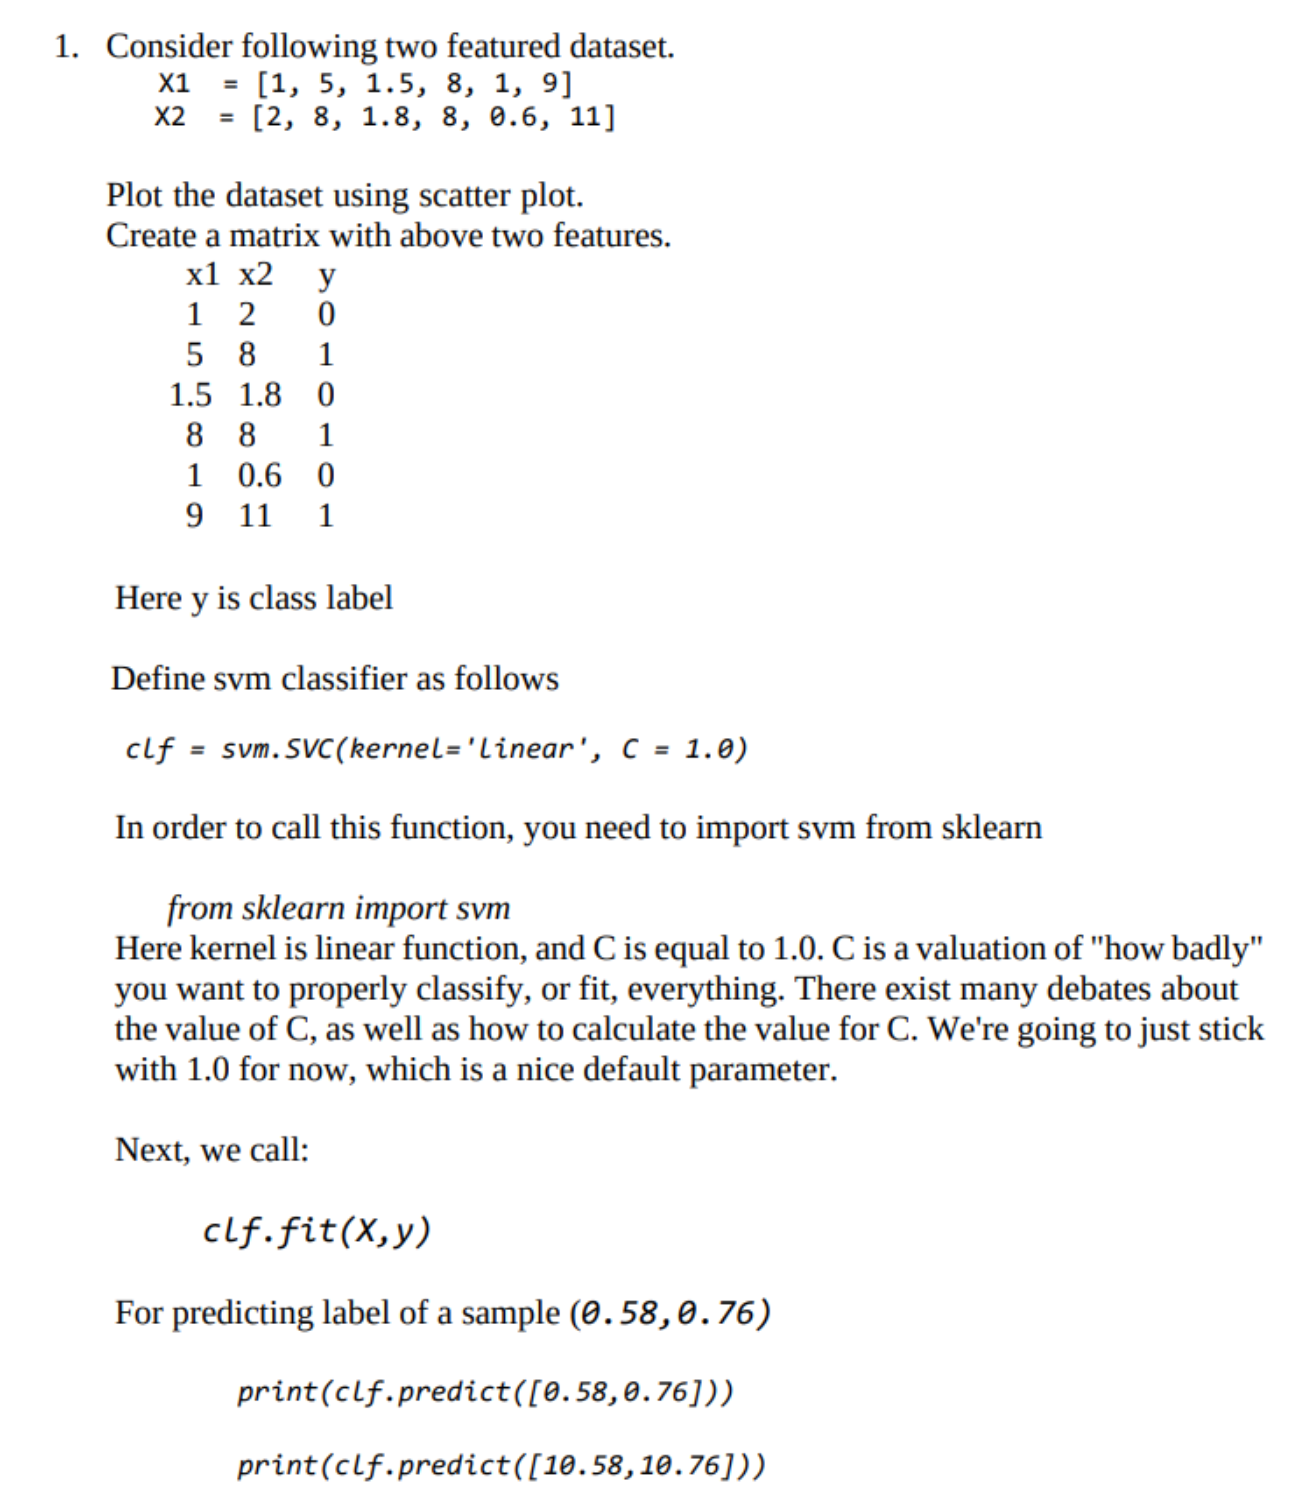

In [1]:
import matplotlib.pyplot as plt 
x1=[1,5,1.5,8,1,9]
x2=[2,8,1.8,8,0.6,11]


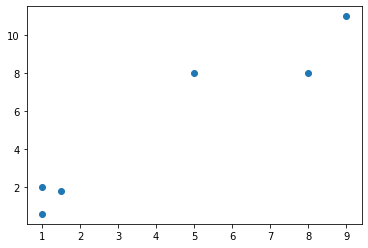

In [2]:
plt.scatter(x1,x2)

In [3]:
import pandas as pd 
d = {'x1': [1,5,1.5,8,1,9], 'x2': [2,8,1.8,8,0.6,11], 'y':[0,1,0,1,0,1]}
data = pd.DataFrame(d)

In [4]:
data

,x1,x2,y
0,1.0,2.0,0
1,5.0,8.0,1
2,1.5,1.8,0
3,8.0,8.0,1
4,1.0,0.6,0
5,9.0,11.0,1


In [5]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=1.0)

In [11]:
x = data.iloc[:,:-1]
x

,x1,x2
0,1.0,2.0
1,5.0,8.0
2,1.5,1.8
3,8.0,8.0
4,1.0,0.6
5,9.0,11.0


In [7]:
y = data['y']
y


0    0
1    1
2    0
3    1
4    0
5    1
Name: y, dtype: int64

In [12]:
clf.fit(x,y)

SVC(kernel='linear')

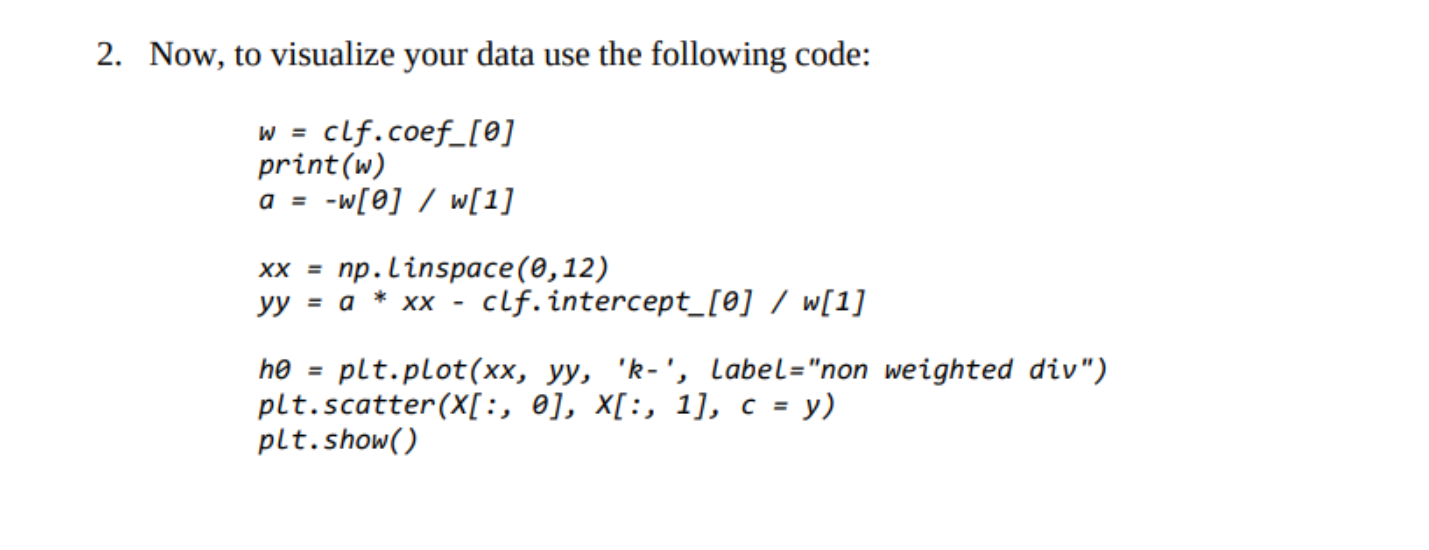

In [14]:
w = clf.coef_[0]
print(w)

[0.1380943  0.24462418]


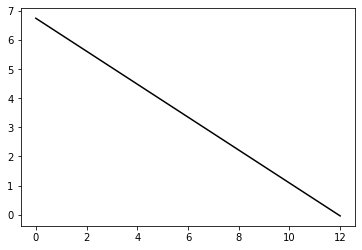

In [16]:
import numpy as np 
a=-w[0]/w[1]
xx=np.linspace(0,12)
yy=a*xx-clf.intercept_[0]/w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

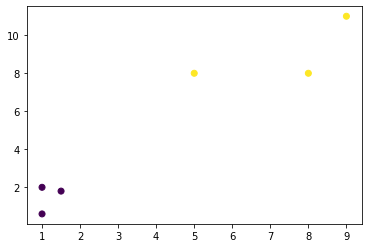

In [20]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1],c = y)
plt.show()

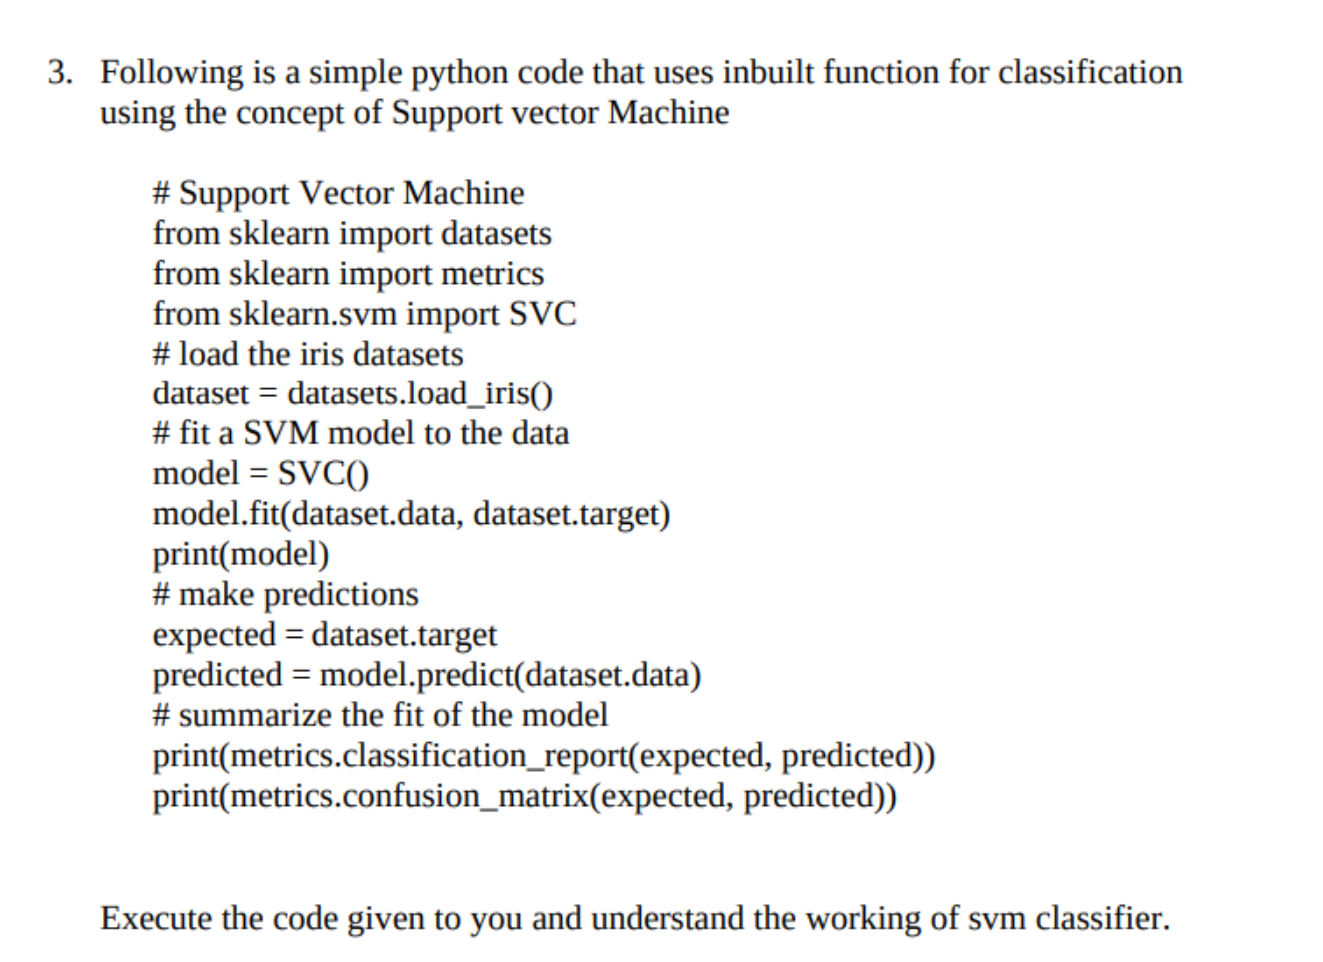

In [21]:
# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
#load theiris datasets
dataset=datasets.load_iris()
# fit a SVM model to the data
model =SVC()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected=dataset.target
predicted = model.predict(dataset.data)
#summarizethe fit of themodel



SVC()


In [22]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [23]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


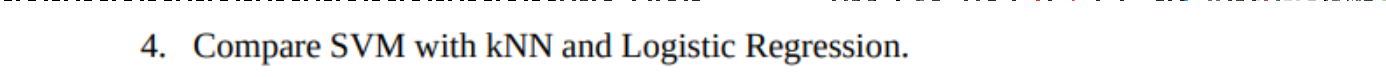

Support Vector Machines (SVM) is a supervised machine learning algorithm that can be used for classification and regression tasks. It works by finding the hyperplane in a high-dimensional space that maximally separates the classes.

K-Nearest Neighbors (KNN) is another supervised machine learning algorithm that is used for classification and regression tasks. It works by finding the K nearest neighbors to a new data point and using the majority class among those neighbors to classify the new data point.

Logistic Regression is a supervised machine learning algorithm that is used for classification tasks. It works by using a logistic function to model the probability of a data point belonging to a certain class.

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

# Create the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)

# Compare the models
print(f"SVM Score: {svm_score:.2f}")
print(f"KNN Score: {knn_score:.2f}")
print(f"Logistic Regression Score: {log_reg_score:.2f}")

SVM Score: 1.00
KNN Score: 0.50
Logistic Regression Score: 1.00


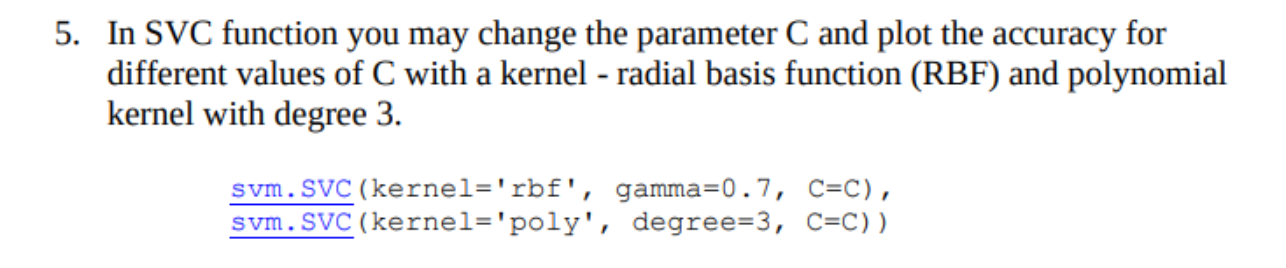

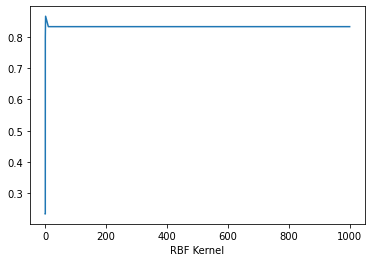

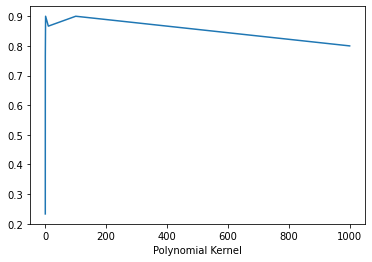

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the iris dataset
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an array of C values to test
Cs = np.logspace(-3, 3, 7)

# Create empty lists to store the scores
rbf_scores = []
poly_scores = []

# Iterate over the C values
for C in Cs:
    # Create an SVM model with an RBF kernel
    rbf_svm = SVC(kernel='rbf', gamma=0.7, C=C)
    rbf_svm.fit(X_train, y_train)
    rbf_score = rbf_svm.score(X_test, y_test)
    rbf_scores.append(rbf_score)
    
    # Create an SVM model with a polynomial kernel
    poly_svm = SVC(kernel='poly', degree=3, C=C)
    poly_svm.fit(X_train, y_train)
    poly_score = poly_svm.score(X_test, y_test)
    poly_scores.append(poly_score)

# Plot the scores
plt.xlabel("RBF Kernel")
plt.plot(Cs, rbf_scores)
plt.show()
plt.xlabel("Polynomial Kernel")
plt.plot(Cs, poly_scores)
plt.show()

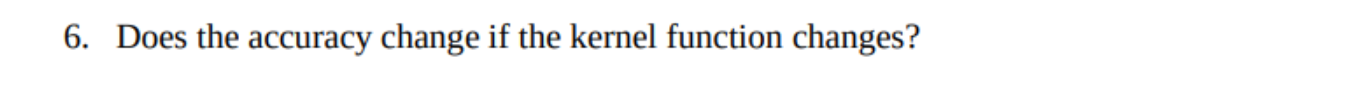

Yes, the accuracy of an SVM model can change depending on the kernel function used. The kernel function is used to transform the input data into a higher-dimensional space, where it may be easier to find a linear separation between the classes. Different kernel functions can result in different transformations of the data, and this can affect the model's ability to separate the classes.

In general, the choice of kernel function will depend on the characteristics of the data and the problem at hand. Some kernel functions may be more effective at separating certain types of data than others. For example, the radial basis function (RBF) kernel is often used for non-linear classification tasks, while the polynomial kernel is often used for linear classification tasks.